🏡 Housing Data Analysis

🔍 Data Preview
       price   area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0   13300000   7420         4          2        3      yes        no       no   
1   12250000   8960         4          4        4      yes        no       no   
2   12250000   9960         3          2        2      yes        no      yes   
3   12215000   7500         4          2        2      yes        no      yes   
4   11410000   7420         4          1        2      yes       yes      yes   
5   10850000   7500         3          3        1      yes        no      yes   
6   10150000   8580         4          3        4      yes        no       no   
7   10150000  16200         5          3        2      yes        no       no   
8    9870000   8100         4          1        2      yes       yes      yes   
9    9800000   5750         3          2        4      yes       yes       no   
10   9800000  13200         3          1        2      yes        no 

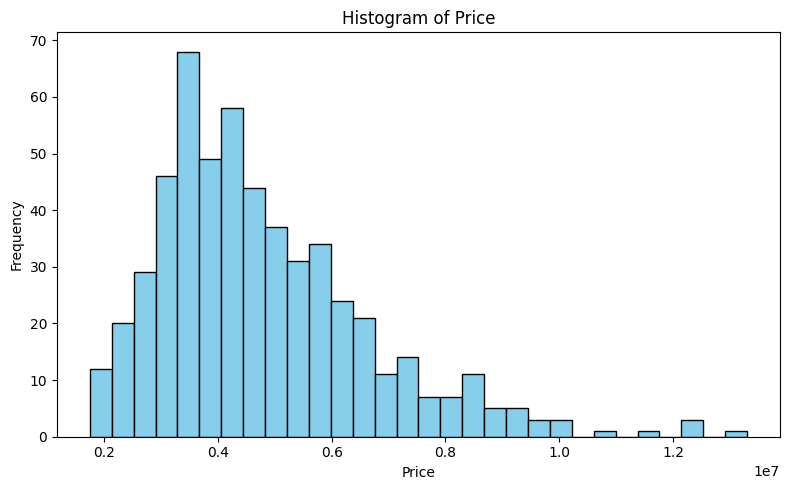

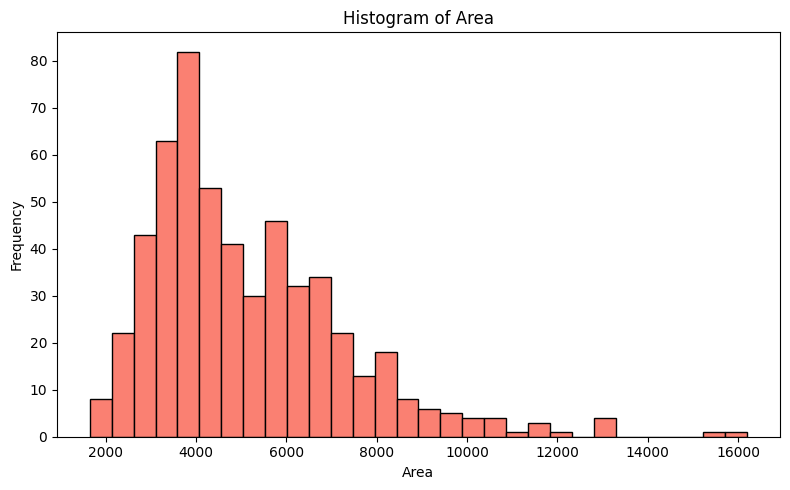

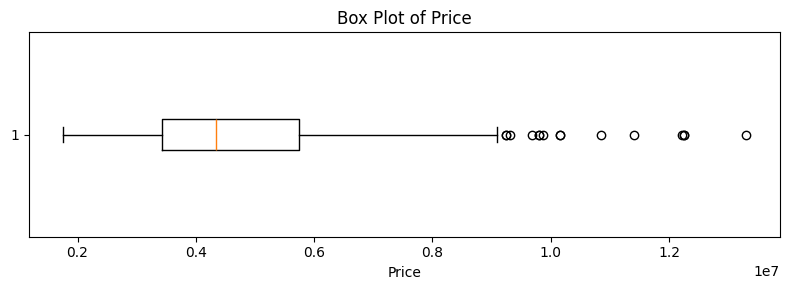

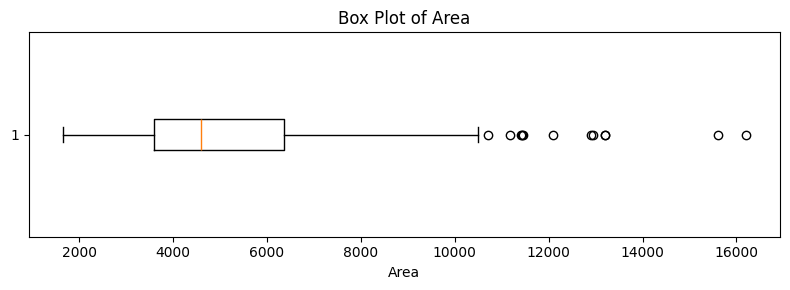

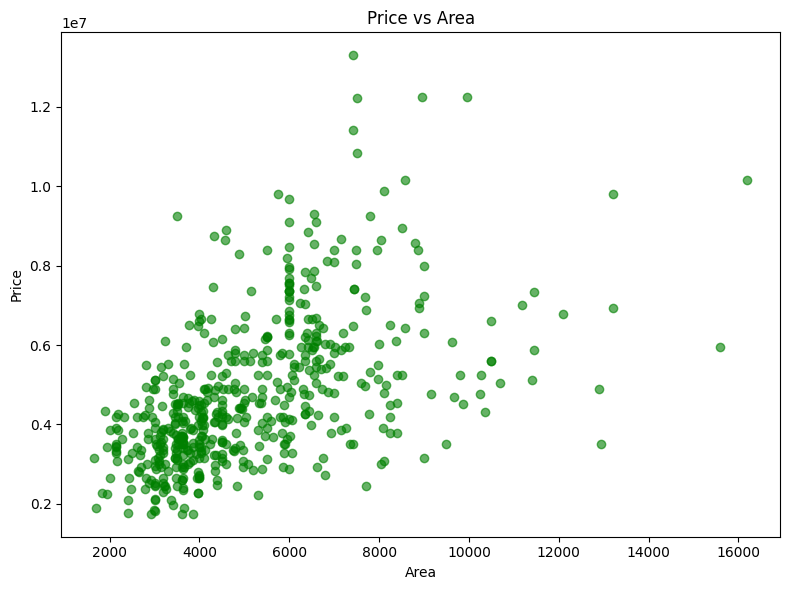


📚 STORY TELLING:

- The housing data shows high average prices with a wide range, indicating significant variation in housing costs.
- Outliers exist, with some properties priced well above the typical range.
- Prices tend to rise with area, but the relationship is not strictly linear.
- Other factors—such as location, amenities, and furnishing—also influence price.
- Skewness and kurtosis suggest the market leans toward higher-end or premium properties.
- Buyers should carefully compare similar homes due to wide price variation.
- Sellers of larger homes may benefit if they price competitively.



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Part 1: Setup & Load Data
print("🏡 Housing Data Analysis")

df = pd.read_csv("/content/sample_data/Housing.csv")

# Part 2: Explore & Clean Data
print("\n🔍 Data Preview")
print(df.head(20))

print("\n📊 Summary Statistics")
print(df.describe())

# Missing values
print("\n🚨 Missing Values")
null_sum = df.isnull().sum()
print(null_sum.rename("Missing Values"))

# Part 3: Compute Statistics
print("\n📈 Descriptive Statistics")

numerical_cols = ['price', 'area', 'bedrooms']

def print_stat(title, values):
    print(f"\n**{title}:**")
    print(values.rename("Value"))

print_stat("Mean", df[numerical_cols].mean())
print_stat("Median", df[numerical_cols].median())
print_stat("Mode", df[numerical_cols].mode().iloc[0])
print_stat("Variance", df[numerical_cols].var())
print_stat("Standard Deviation", df[numerical_cols].std())
print_stat("Skewness", df[numerical_cols].skew())
print_stat("Kurtosis", df[numerical_cols].kurt())
print_stat("Min Values", df[numerical_cols].min())
print_stat("Max Values", df[numerical_cols].max())

# Part 4: Visualizations
print("\n📉 Generating Visualizations...")

# Histogram: Price
plt.figure(figsize=(8, 5))
plt.hist(df['price'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.title("Histogram of Price")
plt.tight_layout()
plt.show()

# Histogram: Area
plt.figure(figsize=(8, 5))
plt.hist(df['area'], bins=30, color='salmon', edgecolor='black')
plt.xlabel("Area")
plt.ylabel("Frequency")
plt.title("Histogram of Area")
plt.tight_layout()
plt.show()

# Box plot: Price
plt.figure(figsize=(8, 3))
plt.boxplot(df['price'], vert=False)
plt.xlabel("Price")
plt.title("Box Plot of Price")
plt.tight_layout()
plt.show()

# Box plot: Area
plt.figure(figsize=(8, 3))
plt.boxplot(df['area'], vert=False)
plt.xlabel("Area")
plt.title("Box Plot of Area")
plt.tight_layout()
plt.show()

# Scatter plot: Price vs Area
plt.figure(figsize=(8, 6))
plt.scatter(df['area'], df['price'], alpha=0.6, color='green')
plt.xlabel("Area")
plt.ylabel("Price")
plt.title("Price vs Area")
plt.tight_layout()
plt.show()

# Part 5: Storytelling
print("\n📚 STORY TELLING:")
print("""
- The housing data shows high average prices with a wide range, indicating significant variation in housing costs.
- Outliers exist, with some properties priced well above the typical range.
- Prices tend to rise with area, but the relationship is not strictly linear.
- Other factors—such as location, amenities, and furnishing—also influence price.
- Skewness and kurtosis suggest the market leans toward higher-end or premium properties.
- Buyers should carefully compare similar homes due to wide price variation.
- Sellers of larger homes may benefit if they price competitively.
""")


**CREATING HEATMAP OF ANALYSIS**

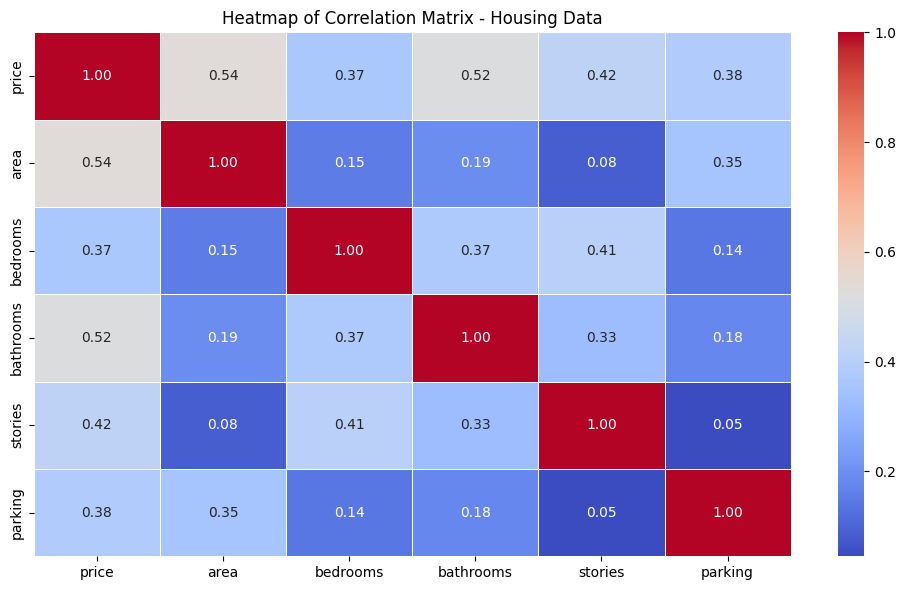

In [ ]:
# Select only numerical columns for the heatmap
numerical_df = df.select_dtypes(include=['number'])

# Compute correlation matrix
corr_matrix = numerical_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Heatmap of Correlation Matrix - Housing Data")
plt.tight_layout()
plt.show()

**Heatmap Description:**
A strong positive association between price and area may be seen in housing data, indicating that larger properties are typically more costly.  Similar to this, there may be moderate to large positive connections between price and characteristics like the number of bedrooms or bathrooms.  The heatmap's color gradient can be used to visually identify these insights: neutral colors (like white or light gray) denote weak or no correlations, while warm colors (like red) suggest significant positive correlations and cool colors (like blue) indicate strong negative correlations.  All things considered, the heatmap assists in locating significant correlations, identifying multicollinearity (a situation in which independent variables exhibit a high degree of correlation with one another), and directing which features could be most helpful for modeling or additional research.

In [ ]:
#GroupBy and Aggregation

# Average house value for each age group
df.groupby("price")['area'].mean().head()

,area
price,
1750000,3460.0
1767150,2400.0
1820000,3000.0
1855000,2990.0
1890000,2674.5


In [ ]:
df.groupby("price")['area'].mean()

,area
price,
1750000,3460.0
1767150,2400.0
1820000,3000.0
1855000,2990.0
1890000,2674.5
...,...
10850000,7500.0
11410000,7420.0
12215000,7500.0


In [ ]:
# Group by 'bathrooms' and calculate mean of all numeric columns
df.groupby("bathrooms").mean(numeric_only=True).head()

,price,area,bedrooms,stories,parking
bathrooms,,,,,
1,4.206913e+06,4920.892768,2.802993,1.630923,0.610973
2,6.209206e+06,5699.526316,3.383459,2.293233,0.894737
3,7.282100e+06,6677.000000,3.800000,2.100000,1.100000
4,1.225000e+07,8960.000000,4.000000,4.000000,3.000000


In [ ]:
df.groupby("bedrooms")["area"].mean()

,area
bedrooms,
1,3710.000000
2,4636.235294
3,5226.620000
4,5582.063158
5,6291.500000
6,3950.000000


In [ ]:
# Mean and Median
df.groupby('area')['price'].agg(['mean', 'median']).head()

,mean,median
area,,
1650,3150000.0,3150000.0
1700,1890000.0,1890000.0
1836,2275000.0,2275000.0
1905,4340000.0,4340000.0
1950,2835000.0,2835000.0


In [ ]:
# Aggregating multiple functions on multiple columns
df.aggregate({
    'price': ['mean', 'sum'],
    'area': ['mean', 'max',sum]
})

/tmp/ipython-input-827209897.py:2: FutureWarning: The provided callable <built-in function sum> is currently using Series.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df.aggregate({


,price,area
mean,4.766729e+06,5.150541e+03
sum,2.597867e+09,2.807045e+06
max,NaN,1.620000e+04


In [ ]:
df.groupby(['price', 'area', 'bedrooms'])['bedrooms'].agg(['mean', 'max', 'min', 'count']).head()

mean  max  min  count
price   area bedrooms                       
1750000 2910 3          3.0    3    3      1
        3620 2          2.0    2    2      1
        3850 3          3.0    3    3      1
1767150 2400 3          3.0    3    3      1
1820000 3000 2          2.0    2    2      1

**CREATING SCATTER PLOT**

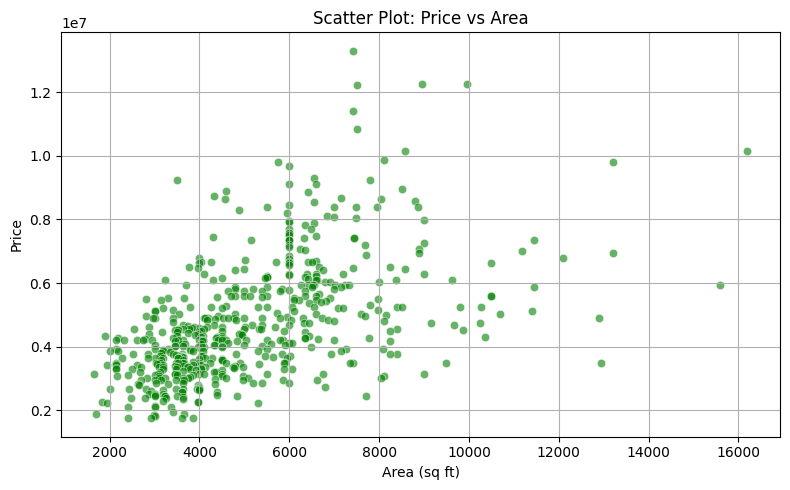

In [ ]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='area', y='price', data=df, color='green', alpha=0.6)
plt.title('Scatter Plot: Price vs Area')
plt.xlabel('Area (sq ft)')
plt.ylabel('Price')
plt.grid(True)
plt.tight_layout()
plt.show()

**SCATTER PLOT ANALYSIS:**

The plot shows that larger houses generally have higher prices, though the relationship isn't perfectly linear. Price increases tend to slow down at larger sizes, and there's a wide range of prices for similar-sized homes, suggesting other factors like location and amenities also affect price. Outliers highlight unusual pricing patterns.

**CREATING BOXPLOT**

<Axes: xlabel='furnishingstatus', ylabel='area'>

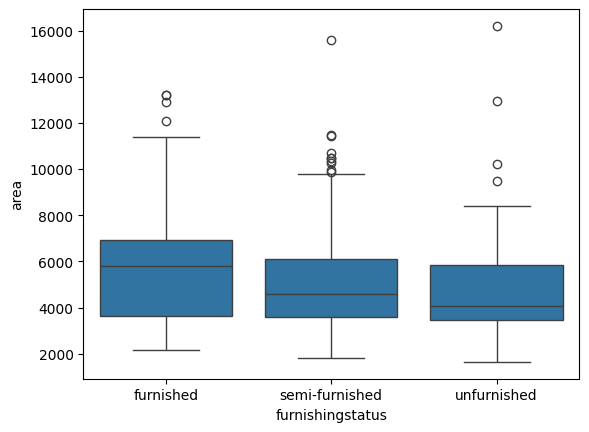

In [ ]:
sns.boxplot(x='furnishingstatus',y='area',data=df)

**BOXPLOT ANALYSIS:**
The box plot shows how house sizes vary across furnishing types. Furnished homes tend to have the largest median area, while unfurnished homes are smaller and more consistent in size. Semi-furnished homes show the most variation in size, indicating a wider range of house areas in that category.

**CREATING COUNT PLOT**

/tmp/ipython-input-2677632564.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='furnishingstatus', data=df, palette='Set2')


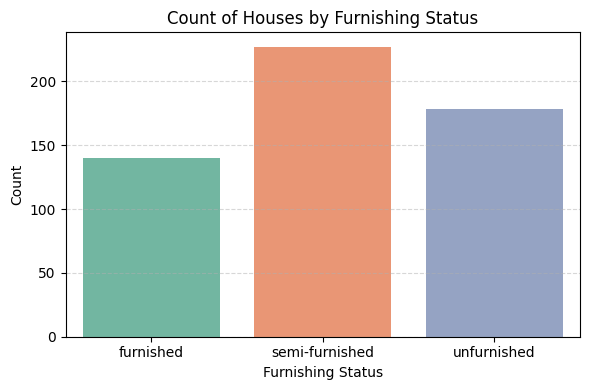

In [ ]:
# Count plot for furnishing status
plt.figure(figsize=(6, 4))
sns.countplot(x='furnishingstatus', data=df, palette='Set2')
plt.title('Count of Houses by Furnishing Status')
plt.xlabel('Furnishing Status')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

**COUNTPLOT ANALYASIS:**
If the plot shows that semi-furnished is the tallest bar, it means most homes listed are semi-furnished, which might indicate market preference or developer trends. A shorter bar for furnished homes may imply either higher cost or lower demand.

**CREATING BAR PLOT**

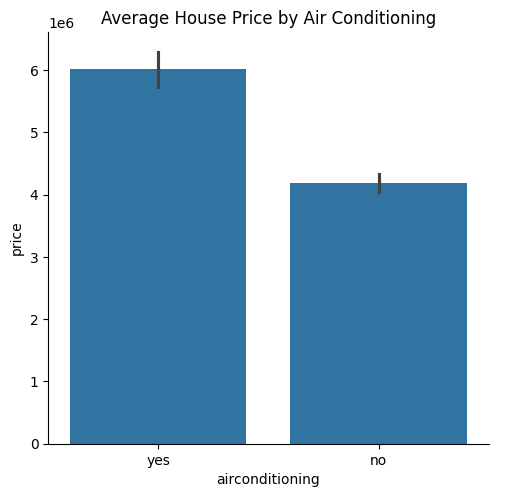

In [ ]:
sns.catplot(data=df, x='airconditioning', y='price', kind='bar')
plt.title("Average House Price by Air Conditioning")
plt.show()

**BARPLOT ANALYSIS:**
There is a positive association between the average price of homes with air conditioning and those without. This implies that air conditioning is a desirable attribute that could raise the value of a home. According to the pattern, buyers are probably prepared to pay more for homes with this feature.

**CREATING VIOLINPLOT**

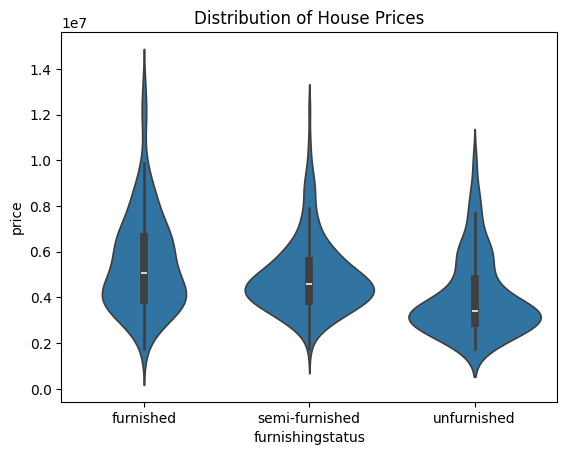

In [ ]:
sns.violinplot(x=df['furnishingstatus'], y=df['price'])
plt.title('Distribution of House Prices')
plt.show()

**VIOLINPLOT ANALYSIS:**
This violin plot illustrates the distribution of house prices across different furnishing categories. The form of each “violin” indicates the range and density of prices—areas that are broader signify a higher number of houses within that price range. It assists in comparing both the average prices and the variability of prices among furnished, semi-furnished, and unfurnished properties.

**CREATING LINEPLOT**

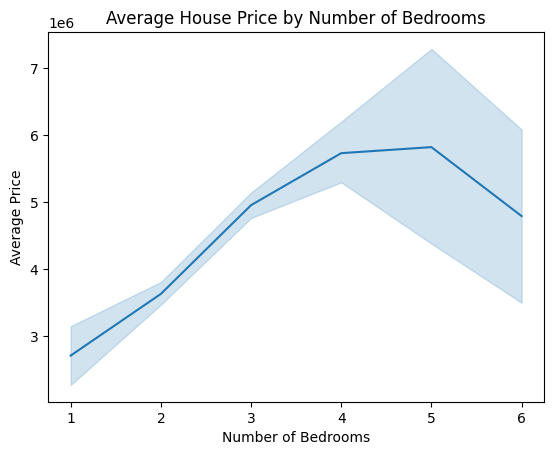

In [ ]:
sns.lineplot(data=df, x='bedrooms', y='price')
plt.title('Average House Price by Number of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Average Price')
plt.show()

**LINEPLOT ANALYSIS:**
This illustrates how the average price of a house varies with the number of bedrooms. It aids in visualizing the trend that houses with additional bedrooms typically command higher prices. The data suggests that as the number of bedrooms increases, the average house price also tends to rise. This demonstrates a positive correlation in which larger homes with more bedrooms typically have higher costs.

**CREATING HISTPLOT**

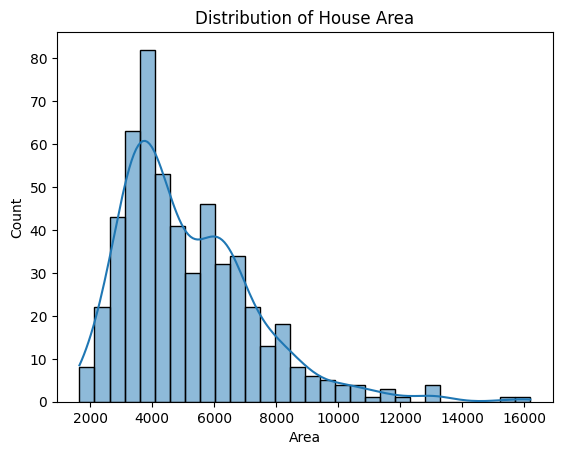

In [ ]:
sns.histplot(data=df, x='area', bins=30, kde=True)
plt.title('Distribution of House Area')
plt.xlabel('Area')
plt.ylabel('Count')
plt.show()

**HISTPLOT ANALYSIS:**
This histogram illustrates the distribution of house sizes within the dataset. It appears that the majority of houses have smaller to medium-sized areas, with larger homes being less prevalent, as reflected by a right-skewed shape. The KDE curve aids in visualizing the density, indicating where house sizes are most concentrated. This implies that most houses tend to fall within a specific size range, while extremely large properties are rarer. In summary, the plot emphasizes the variation in house sizes and the average dimensions buyers can anticipate.

**CREATING KDE PLOT**

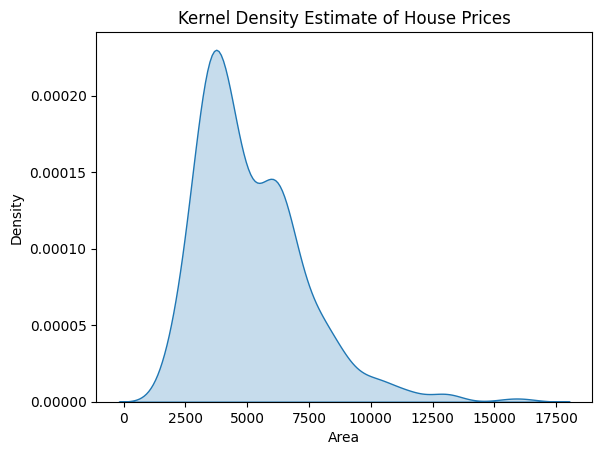

In [ ]:
sns.kdeplot(data=df, x='area', fill=True)
plt.title('Kernel Density Estimate of House Prices')
plt.xlabel('Area')
plt.ylabel('Density')
plt.show()


**KDE ANALYSIS:**
This KDE plot illustrates the distribution of house area within the dataset. The curve depicts how various house sizes are distributed, with the highest peak representing the most prevalent range of house sizes. A right-skewed plot indicates that smaller houses are more prevalent, while larger homes are less common. The smooth curve simplifies the identification of where most house areas are concentrated and whether the distribution is broad (varied in size) or narrow (similar in size). In summary, it offers a clear perspective on the typical house size and the variation in area among properties.

**CREATING PAIRPLOT**

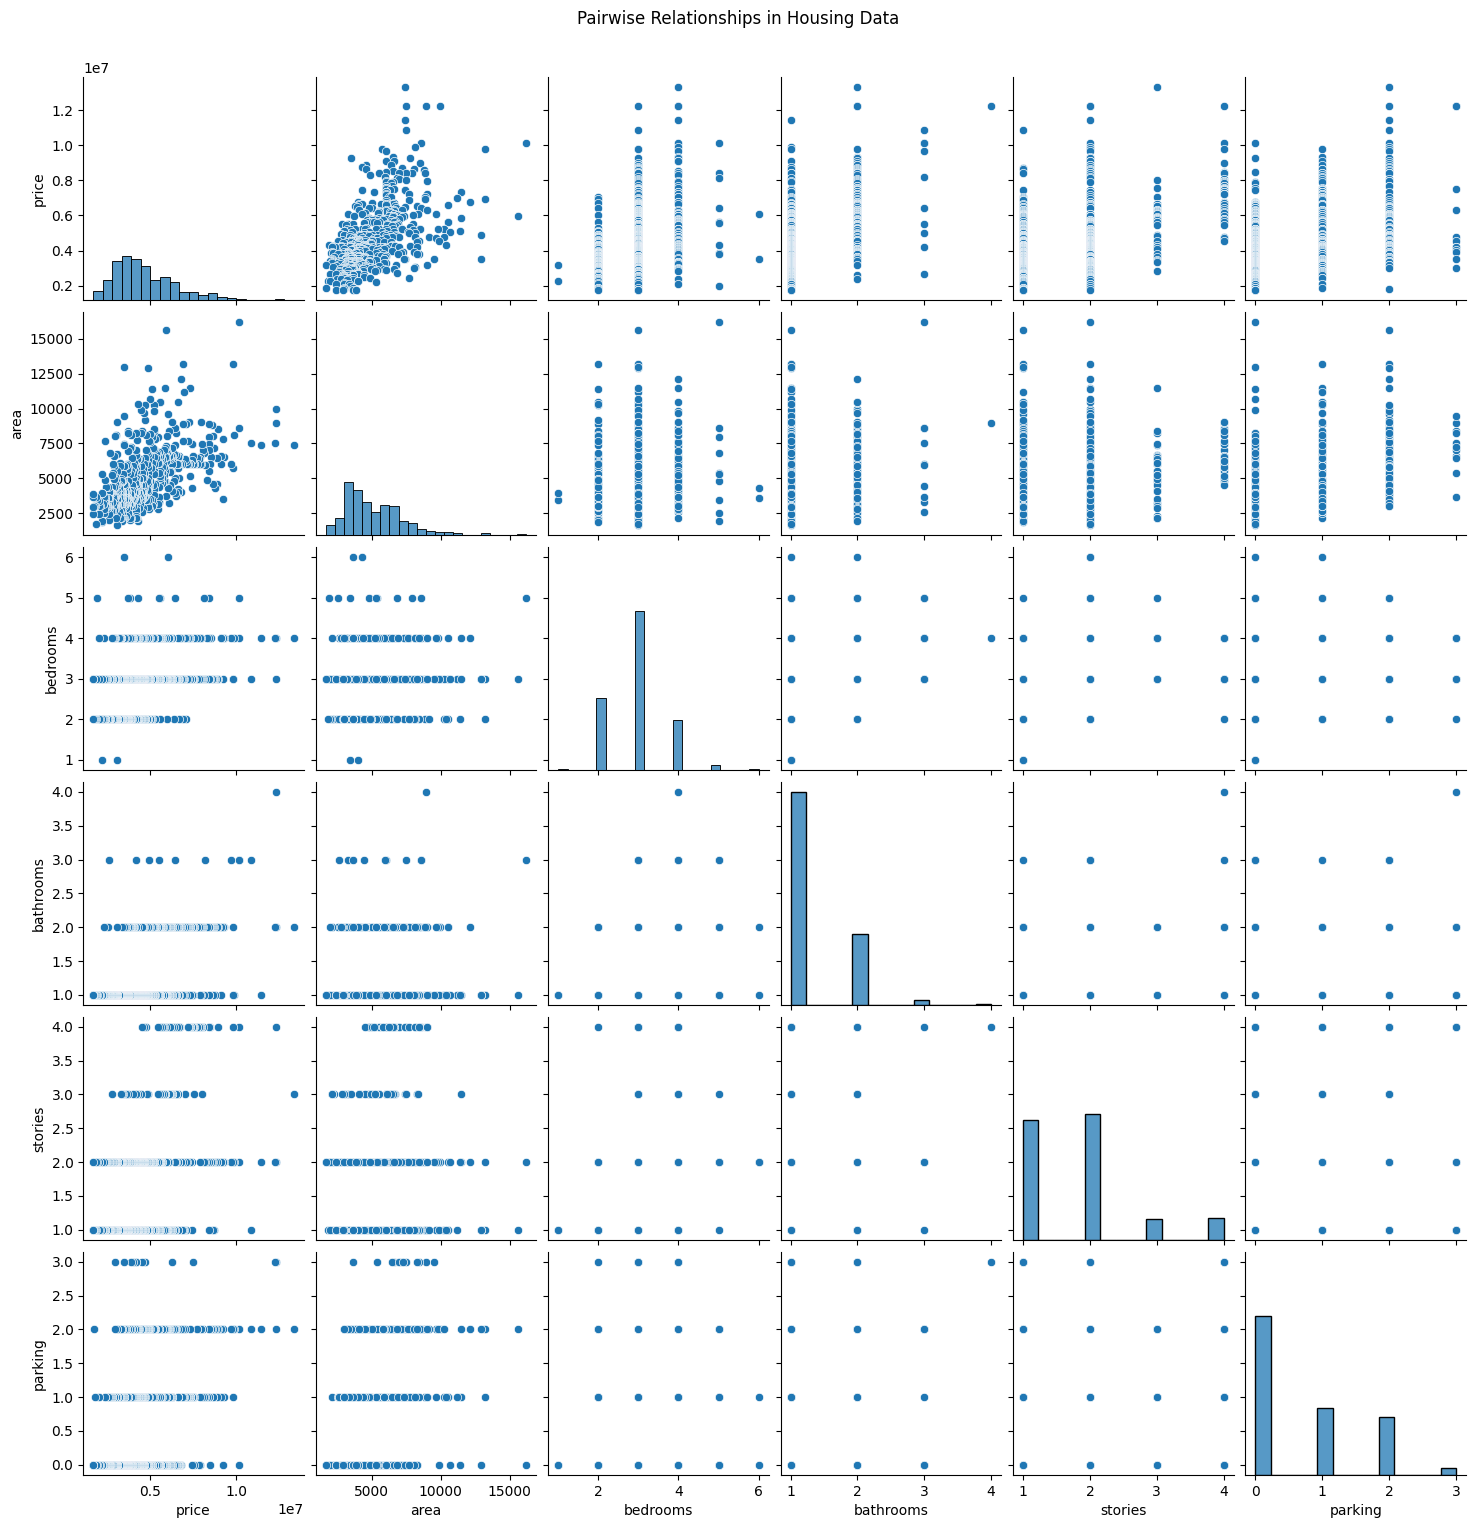

In [ ]:
numeric_columns = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']
sns.pairplot(data=df[numeric_columns])
plt.suptitle('Pairwise Relationships in Housing Data', y=1.02)
plt.show()

**PAIRPLOT ANALYSIS:**
Scatter Plots (Off-Diagonal)
These illustrate the relationship between two variables:

The correlation between Price and Area is likely positive, indicating that larger houses generally command higher prices.

Other associations (such as price in relation to the number of bedrooms or bathrooms) may exhibit weaker or more dispersed patterns.

Diagonal Plots (Histograms or KDEs)
These depict the distribution of each individual variable:

The Price distribution may be right-skewed, implying that the majority of houses fall within a lower price bracket.

Similarly, the Area distribution might also reflect a skew towards smaller homes.

Variables such as Bedrooms, stories, and parking are discrete, which may result in distinct bars at integer values.

Clusters or Grouping (if hue is used)
When employing hue='furnishingstatus', one can observe how various furnishing types cluster across different features—for instance, furnished homes may group in higher price and area categories.

Outliers
Points that are significantly distant from the cluster (particularly regarding price or area) can be visually recognized as outliers.

**CREATE STRIP PLOT**

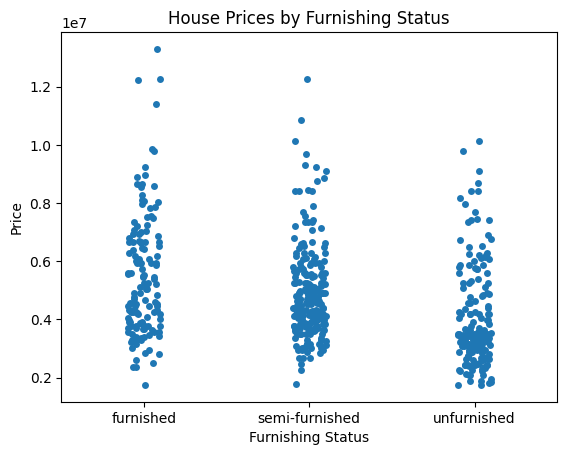

In [ ]:
sns.stripplot(data=df, x='furnishingstatus', y='price', jitter=True)
plt.title('House Prices by Furnishing Status')
plt.xlabel('Furnishing Status')
plt.ylabel('Price')
plt.show()

**STRIP PLOT ANALYSIS:**
The stripplot shows how house prices vary across different furnishing types. It helps identify which furnishing categories have higher or lower price ranges and how spread out the prices are within each group. Clusters of dots suggest common price levels, while outliers stand out easily.
Each dot represents a house.Dots are plotted by furnishing status on the x-axis and price on the y-axis.jitter=True spreads points horizontally to avoid overlap, making it easier to see data concentration.

**CREATE SWARM PLOT**

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 6.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


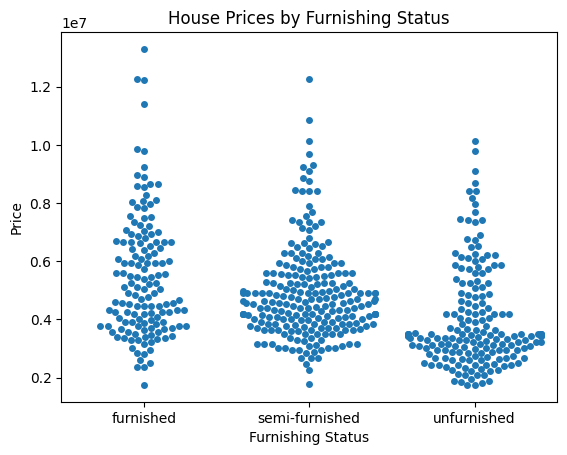

In [ ]:
sns.swarmplot(data=df, x='furnishingstatus', y='price')
plt.title('House Prices by Furnishing Status')
plt.xlabel('Furnishing Status')
plt.ylabel('Price')
plt.show()

**SWARMPLOT ANALYSIS:**
The swarmplot clearly displays how house prices are distributed across furnishing categories. It reveals data concentration, spread, and potential outliers more clearly than a stripplot, especially when there are many overlapping points.
Each point represents a house.
Points are grouped by furnishingstatus on the x-axis.
Y-axis shows the price.
Points are automatically arranged so they don’t overlap.

**CREATE POINTPLOT:**


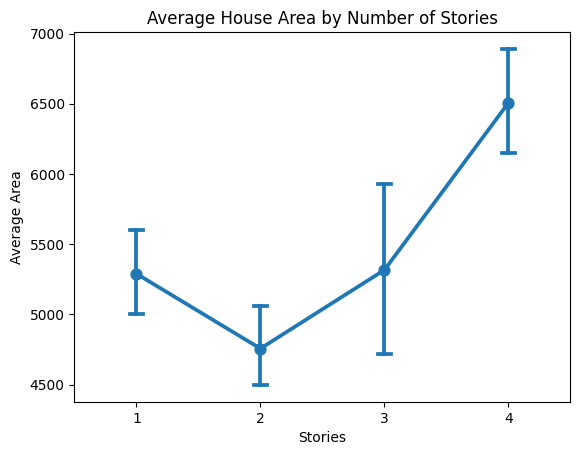

In [ ]:
sns.pointplot(data=df, x='stories', y='area', capsize=0.1)
plt.title('Average House Area by Number of Stories')
plt.xlabel('Stories')
plt.ylabel('Average Area')
plt.show()

**POINTPLOT ANALYSIS:**

This point plot shows the average house area for different numbers of stories. As the number of stories increases, the average area also increases, indicating a positive relationship between the two. Homes with more stories tend to be larger in size, which is expected, as additional floors often mean more total living space. The error bars (confidence intervals) indicate how consistent the area sizes are for each story level—shorter bars mean more consistent sizes, while longer bars suggest more variation in house sizes at that story count.
